In [1]:
import pandas as pd

# 파일 경로 설정
competition_info_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/데이콘 경진대회/data/open/competition_info.csv'
participate_log_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/데이콘 경진대회/data/open/participate_log.csv'
submission_log_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/데이콘 경진대회/data/open/submission_log.csv'
talk_log_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/데이콘 경진대회/data/open/talk_log.csv'
codeshare_log_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/데이콘 경진대회/data/open/codeshare_log.csv'

# 각 파일 읽기
competition_info = pd.read_csv(competition_info_path)
participate_log = pd.read_csv(participate_log_path)
submission_log = pd.read_csv(submission_log_path)
talk_log = pd.read_csv(talk_log_path)
codeshare_log = pd.read_csv(codeshare_log_path)

# 각 데이터프레임의 첫 5행을 출력하여 구조 확인
(competition_info.head(), participate_log.head(), submission_log.head(), talk_log.head(), codeshare_log.head())


(       ID                 대회명                             키워드        시작시간  \
 0  ID_000  대출 상점 총 매출 예측 경진대회      알고리즘 | 정형 | 회귀 | 금융 | RMSE  2018-08-14   
 1  ID_001    아파트 경매가격 예측 경진대회     알고리즘 | 정형 | 회귀 | 아파트 | RMSE  2018-10-18   
 2  ID_002  KBO 타자 OPS 예측 경진대회    알고리즘 | 정형 | 회귀 | 스포츠 | WRMSE  2019-02-08   
 3  ID_003  상점 신용카드 매출 예측 경진대회  알고리즘 | 정형 | 회귀 | 매출 | 회귀 | MAE  2019-07-11   
 4  ID_004      전력 수요량 예측 경진대회     알고리즘 | 정형 | 회귀 | 공공 | SMAPE  2019-10-01   
 
          종료시간  참여자 수                 상금 정보  최대 팀원 수  수상자 수  일일 제출횟수   평가산식  \
 0  2018-09-13    577   $8,500 + 100,000ZPR      5.0      3      5.0   RMSE   
 1  2018-12-31    612  $10,000 + 120,000ZPR     10.0      3      3.0   RMSE   
 2  2019-07-18   1103                 800만원      5.0      3      3.0  WRMSE   
 3  2019-10-21   1416                 200만원      5.0      3    100.0    MAE   
 4  2019-10-27    789                 600만원      4.0      3      3.0  SMAPE   
 
    참가조건 여부  연습가능 여부  아이디어 대회 여부  월간 데이콘 여부  \
 0     

In [2]:
# 대회별 참가자 수, 제출 수, 토크 수, 코드 공유 수 집계
# 각 로그 파일에서 대회 ID 별로 집계합니다.

# 참가자 수 집계
participate_counts = participate_log.groupby('ID')['참가자 수'].sum()

# 제출 수 집계
submission_counts = submission_log.groupby('ID')['제출 수'].sum()

# 토크 수 및 댓글 수 집계
talk_counts = talk_log.groupby('ID').agg({'토크 수':'sum', '댓글 수':'sum'})

# 코드 공유 수 집계
codeshare_counts = codeshare_log.groupby('ID')['코드 공유 수'].sum()

# 모든 데이터를 하나의 데이터프레임으로 합치기
combined_df = pd.DataFrame({
    '참가자 수': participate_counts,
    '제출 수': submission_counts,
    '토크 수': talk_counts['토크 수'],
    '댓글 수': talk_counts['댓글 수'],
    '코드 공유 수': codeshare_counts
}).reset_index()

# competition_info와 결합하여 대회명과 다른 정보 포함
trend_analysis_df = pd.merge(combined_df, competition_info[['ID', '대회명', '키워드', '시작시간', '종료시간']], on='ID', how='left')

trend_analysis_df.head()


,ID,참가자 수,제출 수,토크 수,댓글 수,코드 공유 수,대회명,키워드,시작시간,종료시간
0,ID_000,1,1109.0,356,353,54.0,대출 상점 총 매출 예측 경진대회,알고리즘 | 정형 | 회귀 | 금융 | RMSE,2018-08-14,2018-09-13
1,ID_001,2,1856.0,32,23,4.0,아파트 경매가격 예측 경진대회,알고리즘 | 정형 | 회귀 | 아파트 | RMSE,2018-10-18,2018-12-31
2,ID_002,97,210.0,760,742,5.0,KBO 타자 OPS 예측 경진대회,알고리즘 | 정형 | 회귀 | 스포츠 | WRMSE,2019-02-08,2019-07-18
3,ID_003,88,840.0,655,627,127.0,상점 신용카드 매출 예측 경진대회,알고리즘 | 정형 | 회귀 | 매출 | 회귀 | MAE,2019-07-11,2019-10-21
4,ID_004,122,1006.0,1090,1145,25.0,전력 수요량 예측 경진대회,알고리즘 | 정형 | 회귀 | 공공 | SMAPE,2019-10-01,2019-10-27


C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52280 (\N{HANGUL SYLLABLE CAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\anaconda3

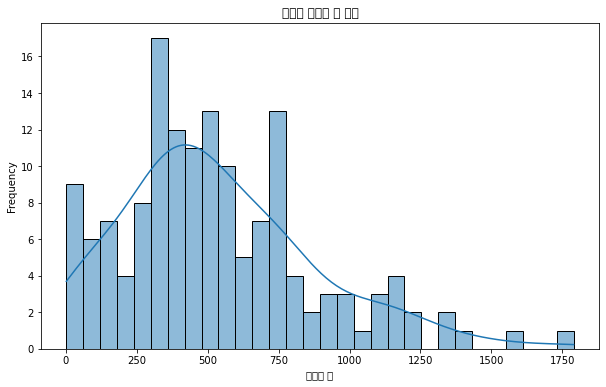

C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\anaconda3

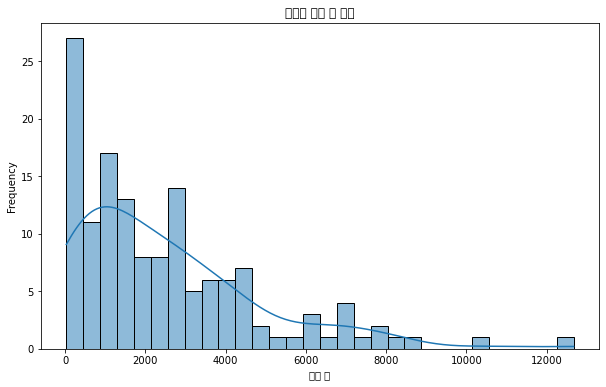

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 기초 통계 및 분포 시각화를 위한 함수 정의
def plot_distribution(data, title, xlabel):
    plt.figure(figsize=(10, 6))
    sns.histplot(data, kde=True, bins=30)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()

# 대회별 참가자 수에 대한 기초 통계 및 분포 시각화
plot_distribution(trend_analysis_df['참가자 수'], '대회별 참가자 수 분포', '참가자 수')

# 대회별 제출 수에 대한 기초 통계 및 분포 시각화
plot_distribution(trend_analysis_df['제출 수'], '대회별 제출 수 분포', '제출 수')


참가자 수:

대부분의 대회에서 참가자 수가 상대적으로 낮은 것으로 보인다. 이는 특정 대회들이 높은 인기를 끌었을 가능성을 시사한다.
일부 대회에서는 매우 높은 참가자 수를 보이며, 이러한 대회들은 특히 주목할 필요가 있다.

제출 수:

제출 수의 분포도 마찬가지로 대부분의 대회에서 낮은 수준을 보이지만, 일부 대회에서는 상당히 높은 제출 횟수를 나타낸다.
이는 해당 대회들이 높은 참여율을 유도했음을 나타낸다.

C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\anaconda3

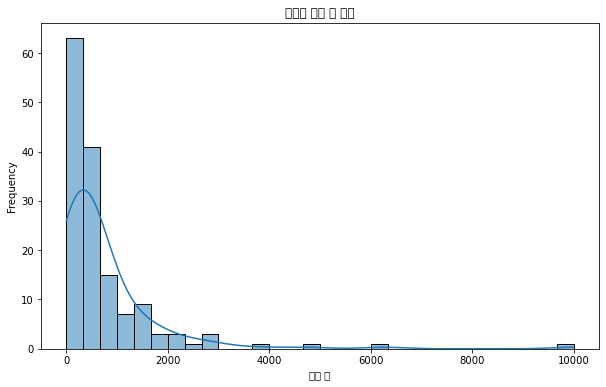

C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82106\anaconda3

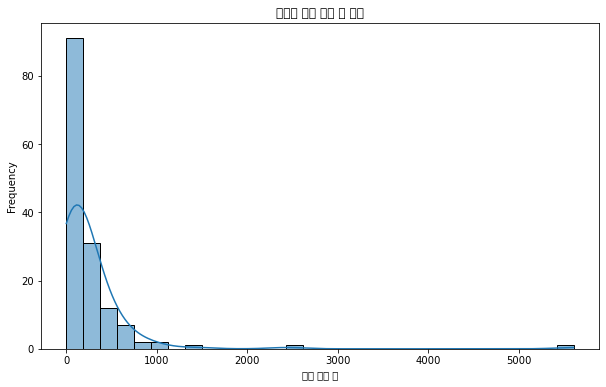

In [4]:
# 대회별 토크 수에 대한 기초 통계 및 분포 시각화
plot_distribution(trend_analysis_df['토크 수'], '대회별 토크 수 분포', '토크 수')

# 대회별 코드 공유 수에 대한 기초 통계 및 분포 시각화
plot_distribution(trend_analysis_df['코드 공유 수'], '대회별 코드 공유 수 분포', '코드 공유 수')


토크 수:

대부분의 대회에서 토크 수가 상대적으로 낮은 수준임을 볼 수 있다. 이는 대회 중 커뮤니티 활동이 일부 대회에 집중되어 있음을 나타낼 수 있다.
높은 토크 수를 보이는 대회는 커뮤니티 내에서 더 많은 관심과 토론을 유발했다고 볼 수 있다.

코드 공유 수:

코드 공유 활동은 대부분의 대회에서 매우 제한적인 것으로 보인다. 이는 참가자들이 코드를 공유하는 것이 일반적이지 않거나, 특정 대회에서만 활발한 활동이 이루어졌음을 나타낼 수 있다.
특정 대회에서는 코드 공유가 활발하게 이루어졌을 가능성이 있으며, 이러한 대회는 특히 주목할 필요가 있다.

In [5]:
from collections import Counter
import itertools

# 대회 키워드 데이터 추출 및 분석
keywords = trend_analysis_df['키워드'].dropna()

# 모든 키워드를 분리하여 리스트로 변환
keyword_list = list(itertools.chain(*[k.split(' | ') for k in keywords]))

# 키워드 빈도수 계산
keyword_counts = Counter(keyword_list)

# 가장 많이 언급된 상위 10개 키워드
top_keywords = keyword_counts.most_common(10)

# 결과 출력
top_keywords


[('알고리즘', 120),
 ('정형', 80),
 ('회귀', 50),
 ('분류', 49),
 ('금융', 18),
 ('정성평가', 17),
 ('RMSE', 16),
 ('분석시각화', 15),
 ('분석', 14),
 ('CV', 14)]

### 알고리즘과 정형 데이터:

'알고리즘'과 '정형'이 가장 많이 언급된 키워드로, 이는 대부분의 데이콘 경진대회가 알고리즘 개발과 정형 데이터 처리에 중점을 두고 있음을 나타낸다.

회귀와 분류: 

'회귀'와 '분류'는 머신 러닝의 두 가지 주요 문제 유형으로, 데이콘 대회에서 자주 다뤄지는 주제임을 시사한다.

특정 분야의 인기:

'금융'과 같은 특정 분야가 상대적으로 더 많은 관심을 받고 있는 것으로 보인다.

평가 방법론:

'RMSE', '정성평가', 'CV' 등의 키워드는 대회의 평가 방법론에 대한 특징을 나타내며, 다양한 평가 기준이 사용되고 있음을 보여준다.

In [6]:
from collections import Counter
import itertools

# 대회 키워드 데이터 추출 및 분석
keywords = trend_analysis_df['키워드'].dropna()

# 모든 키워드를 분리하여 리스트로 변환
keyword_list = list(itertools.chain(*[k.split(' | ') for k in keywords]))

# 키워드 빈도수 계산
keyword_counts = Counter(keyword_list)

# 가장 많이 언급된 상위 10개 키워드
top_keywords = keyword_counts.most_common(10)

# 결과 출력
top_keywords


[('알고리즘', 120),
 ('정형', 80),
 ('회귀', 50),
 ('분류', 49),
 ('금융', 18),
 ('정성평가', 17),
 ('RMSE', 16),
 ('분석시각화', 15),
 ('분석', 14),
 ('CV', 14)]

알고리즘 중심:

두 해 모두 '알고리즘'이 가장 많이 언급된 키워드로, 데이콘 대회가 알고리즘 기반의 해결 방법에 큰 중점을 두고 있음을 보여준다.


회귀와 정형 데이터의 중요성: 

'회귀'와 '정형'은 두 해 모두 상위 키워드로 등장하여, 회귀 분석과 정형 데이터 처리가 데이콘 대회의 주요 주제임을 나타낸다.

분야의 다양화:

2020년에 '분류'와 '분석'이 더 높은 빈도로 언급되어, 대회 주제와 기술이 다양화되고 있음을 시사한다.